In [1]:
#Exercise - Housing Prices Competition for Kaggle Learn Users

##### To Do

- Load in the train data for the Housing prices Competition.
- Understand the data
- build a model on train data
- make prediction on test
- submit predictions on the kaggle competition.

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [5]:
#load in data

df = pd.read_csv('./data/Housing Prices Competition/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Understanding the Data

In [7]:
##print the dataframe
df.shape

(1460, 81)

In [8]:
#print df columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#quick check of all null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Data Cleaning

In [10]:
for col in df.select_dtypes(include='number'):   # only numeric columns
    thresh = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=thresh)

In [11]:
# checking to see how many null values we have in each of the other columns
columns_with_nulls = []
for column in df.columns:
    if df.loc[:, column].isnull().any():
        columns_with_nulls.append(column)

for column in columns_with_nulls:
    percent_missing = round(((df.loc[df.loc[:, column].isnull()].shape[0] / df.shape[0]) * 100), 4)
    print("Column {} has {}% missing values \n".format(column, percent_missing))

Column LotFrontage has 17.7397% missing values 

Column Alley has 93.7671% missing values 

Column MasVnrType has 59.726% missing values 

Column MasVnrArea has 0.5479% missing values 

Column BsmtQual has 2.5342% missing values 

Column BsmtCond has 2.5342% missing values 

Column BsmtExposure has 2.6027% missing values 

Column BsmtFinType1 has 2.5342% missing values 

Column BsmtFinType2 has 2.6027% missing values 

Column Electrical has 0.0685% missing values 

Column FireplaceQu has 47.2603% missing values 

Column GarageType has 5.5479% missing values 

Column GarageYrBlt has 5.5479% missing values 

Column GarageFinish has 5.5479% missing values 

Column GarageQual has 5.5479% missing values 

Column GarageCond has 5.5479% missing values 

Column PoolQC has 99.5205% missing values 

Column Fence has 80.7534% missing values 

Column MiscFeature has 96.3014% missing values 



#### First iteration thoughts

Some of the columns which contain a very high amount of missing values, like MiscFeature, Fence, PoolQC, Alley and LotFrontage will be dropped. 

-- We can also drop similar or highly correlated columns.

In [12]:
# for columns with only a very small amoung of null values, we will simply drop the nulls that are there.
columns_with_few_nulls = ['MasVnrType',
                          'BsmtQual',
                          'BsmtCond',
                          'BsmtExposure',
                          'BsmtFinType1',
                         'BsmtFinType2',
                         'Electrical',
                         'GarageType',
                         'GarageYrBlt',
                         'GarageFinish',
                         'GarageQual',
                         'GarageCond']
for column in columns_with_few_nulls:
    df = df.loc[~df.loc[:, column].isnull()]

In [13]:
# shape after dropping few nulls
df.shape

(575, 81)

In [14]:
# updating our "columns_with_nulls" list
columns_with_nulls = []
for column in df.columns:
    if df.loc[:, column].isnull().any():
        columns_with_nulls.append(column)
columns_with_nulls

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [15]:
percent_columns_with_nulls = (len(columns_with_nulls) / len(df.columns)) * 100
print("Percentage of columns still containing missing values: {}".format(percent_columns_with_nulls))

Percentage of columns still containing missing values: 7.4074074074074066


For our first model iteration, we will drop the rest columns still containing missing values

### Train-Test Split
To prevent data leakage, we will do our train/test split now, to hold out one part of the dataset completely away as the holdout set.

In [16]:
df = df.drop(columns=columns_with_nulls)

#drop the Id column
df = df.drop(['Id','Utilities'],axis=1)

df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
   

In [17]:
# splitting data into features and targets 
x = df.drop(columns=['SalePrice','Condition2','Street'])
y = df.loc[:, 'SalePrice']

# Removing 15% of data as holdout
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

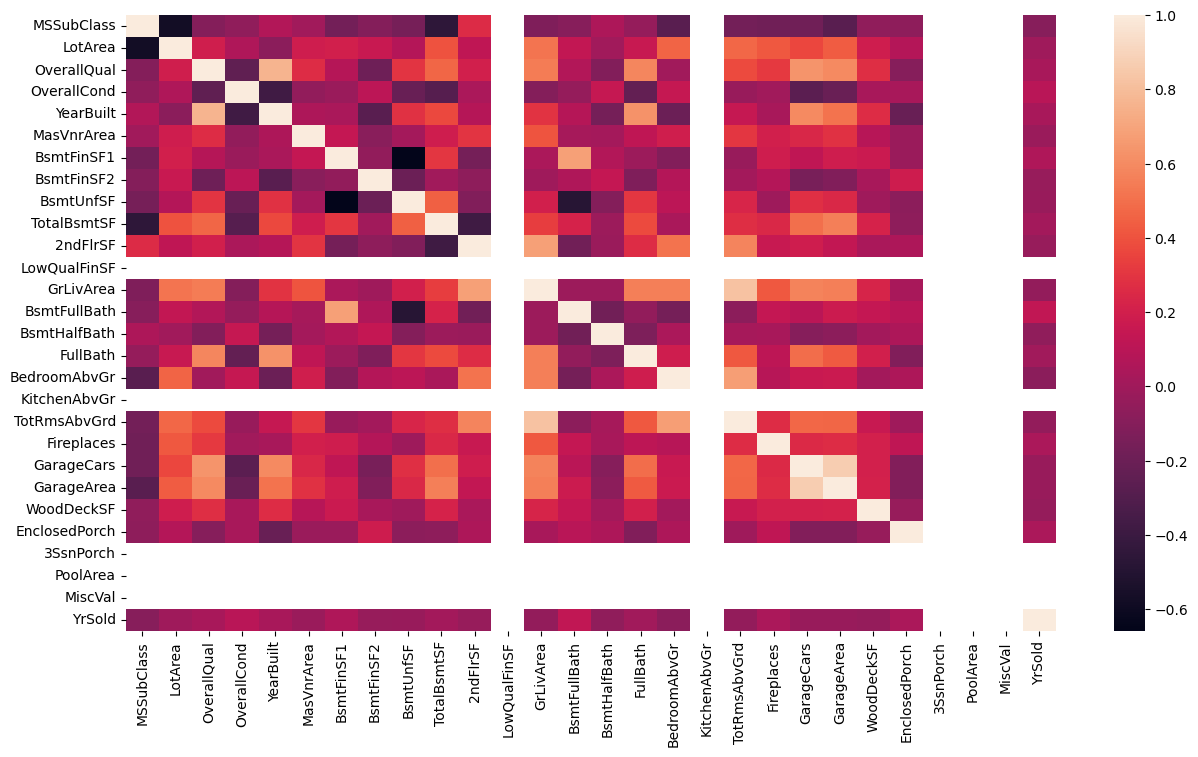

In [34]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(x_train.select_dtypes(include=["number"]).corr())


plt.show()

In [35]:
x_train.columns

Index(['Heating', 'CentralAir', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')

In [20]:
#remove highly correlated columns

high_corr = ['1stFlrSF','YearRemodAdd','GarageYrBlt','MoSold','ScreenPorch','OpenPorchSF','HalfBath']

x_train = x_train.drop(high_corr,axis=1)

### Feature Engineering

In [21]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [name for name in x_train.columns if x_train[name].nunique() < 3 and x_train[name].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in x_train.columns if x_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols

x_train = x_train[my_cols].copy()
x_test = x_test[my_cols].copy()

print('My dataframe now has {} columns.'.format(len(my_cols)))

My dataframe now has 30 columns.


In [22]:
print(my_cols)

['Heating', 'CentralAir', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold']


#### Define Pipelines for Preprocessing

In [23]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

In [24]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ])

## ML Model

### Linear Regression

In [25]:
x_test.columns

Index(['Heating', 'CentralAir', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')

In [26]:
#baseline model
lr_model = LinearRegression()


lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', lr_model)
                             ])


# Preprocessing of training data, fit model 
lr_pipe.fit(x_train, y_train)

# Preprocessing of test data, get predictions
preds = lr_pipe.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Linear Regression', score)

MAE for Linear Regression 18794.3782745752


#### Random Forest

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])


# Preprocessing of training data, fit model 
rf_pipe.fit(x_train, y_train)

# Preprocessing of test data, get predictions
preds = rf_pipe.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Random Forest', score)

MAE for Random Forest 18236.48811594203


#### Cross Validate

In [28]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(rf_pipe, x, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores for the Random Forest", scores)

MAE scores for the Random Forest [19987.6404058  16376.09855072 17354.33582609 15705.5237971
 18323.98286957]


##### In my Second Iteration

- deal with outliers
- check my feature importance
- remove unneccesary columns
- iterate over model hyperparameters
- deal with utilities column

##### Print Feature Importance

In [29]:
feat_imp = pd.DataFrame()

feat_imp['column_names'] = x_train.columns
feat_imp['feature_importance'] = rf_pipe.steps[1][1].feature_importances_

feat_imp

,column_names,feature_importance
0,Heating,0.004334
1,CentralAir,0.034160
2,MSSubClass,0.666864
3,LotArea,0.004543
4,OverallQual,0.028596
5,OverallCond,0.011408
6,YearBuilt,0.020059
7,MasVnrArea,0.000706
8,BsmtFinSF1,0.007966
9,BsmtFinSF2,0.025946


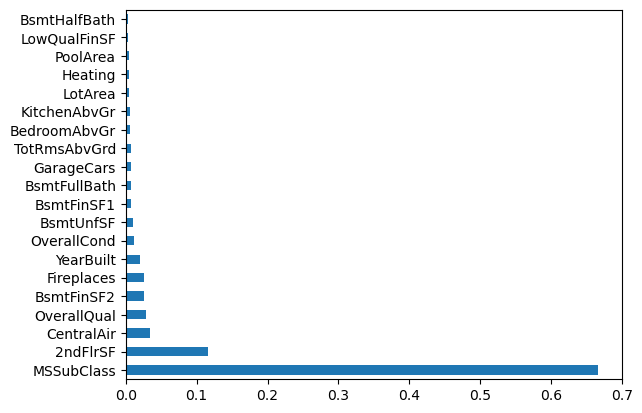

In [30]:
feat_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Cross Validation + Grid Search

In [31]:
x_train

,Heating,CentralAir,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold
162,GasA,Y,20,12182.00,7,5,2005,226.0,1201,0.0,...,7,1,2,532.0,0,0.0,0,0,0,2010
580,GasA,Y,20,14585.00,6,6,1960,85.0,594,219.0,...,7,2,2,572.0,216,0.0,0,0,0,2007
151,GasA,Y,20,13891.00,8,5,2007,436.0,1274,0.0,...,6,1,3,850.1,0,0.0,0,0,0,2008
1088,GasA,Y,160,2522.00,7,5,2004,50.0,0,0.0,...,7,0,2,380.0,0,0.0,0,0,0,2006
144,GasA,Y,90,9100.00,5,5,1963,336.0,1274,0.0,...,10,0,2,504.0,0,0.0,0,0,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,GasA,Y,20,17401.15,6,5,1960,112.0,639,0.0,...,7,2,2,528.0,210,0.0,0,0,0,2010
253,GasA,Y,80,9350.00,6,7,1964,108.0,270,396.2,...,7,0,1,309.0,333,0.0,0,0,0,2007
667,GasA,Y,20,8125.00,6,5,1994,258.0,1138,0.0,...,7,1,2,575.0,224,0.0,0,0,0,2008
1083,GasA,Y,20,8800.00,6,6,1964,425.0,553,0.0,...,6,2,1,461.0,0,0.0,0,0,0,2006


In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'model__n_estimators': [100, 500, 1000],
    'model__max_depth': [2, 4, 5,6]
}

clf = GridSearchCV(rf_pipe, params, cv=5, return_train_score=True,error_score='raise')
clf.fit(x_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [2, 4, ...], 'model__n_estimators': [100, 500, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,True
,transformers,"[('numerical', ...), ('categorical', ...)]"


In [33]:
res = clf.cv_results_
print(res.keys())

res = pd.DataFrame(res)

cols = [r for r in res.columns if ('score' in r and 'mean' in r)]

print(np.max(res.loc[:, 'mean_test_score']))
res.loc[:, cols]

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model__max_depth', 'param_model__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])
0.8313259103189292


,mean_score_time,mean_test_score,mean_train_score
0,0.002897,0.722090,0.759267
1,0.007647,0.723774,0.760520
2,0.013357,0.724049,0.760572
3,0.002869,0.806436,0.894171
4,0.008355,0.810136,0.895080
5,0.014172,0.809938,0.895369
6,0.002859,0.818938,0.930190
7,0.008546,0.823013,0.930892
8,0.015197,0.822901,0.931069
9,0.002668,0.827307,0.952301
